In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Gorontalo.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  364 non-null    datetime64[ns]
 1   Tn       363 non-null    float64       
 2   Tx       363 non-null    float64       
 3   Tavg     358 non-null    float64       
 4   RH_avg   358 non-null    float64       
 5   RR       357 non-null    float64       
 6   ss       361 non-null    float64       
 7   ff_x     363 non-null    float64       
 8   ddd_x    363 non-null    float64       
 9   ff_avg   363 non-null    float64       
 10  ddd_car  363 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 31.4+ KB


<ipython-input-2-acf9eb8334b6>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,23.8,32.0,0.0,27.5
1,2023-02-01,23.8,32.7,0.0,27.4
2,2023-03-01,23.6,34.4,0.0,28.0
3,2023-04-01,23.8,34.0,0.0,27.7
4,2023-05-01,24.6,34.7,0.0,28.4
...,...,...,...,...,...
359,2023-12-16,24.8,32.8,0.0,28.1
360,2023-12-17,24.6,32.5,0.0,28.4
361,2023-12-18,24.1,32.9,0.0,28.4
362,2023-12-19,23.9,34.3,0.0,28.8


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

79

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,23.8,32.0,0.0,27.5
1,31,31,2023-01-02,23.4,27.3,15.4,24.6
2,59,60,2023-01-03,21.8,33.2,0.0,26.8
3,90,92,2023-01-04,23.8,33.1,0.5,27.2
4,120,123,2023-01-05,24.3,34.4,1.5,28.3
...,...,...,...,...,...,...,...
319,319,359,2023-12-16,24.8,32.8,0.0,28.1
320,320,360,2023-12-17,24.6,32.5,0.0,28.4
321,321,361,2023-12-18,24.1,32.9,0.0,28.4
322,322,362,2023-12-19,23.9,34.3,0.0,28.8


In [8]:
#cek null
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         1
Tx         1
RR         5
Tavg       5
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
ma = df1['Tavg'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       1
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

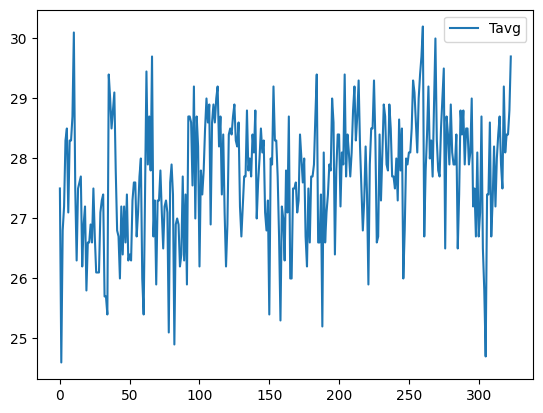

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

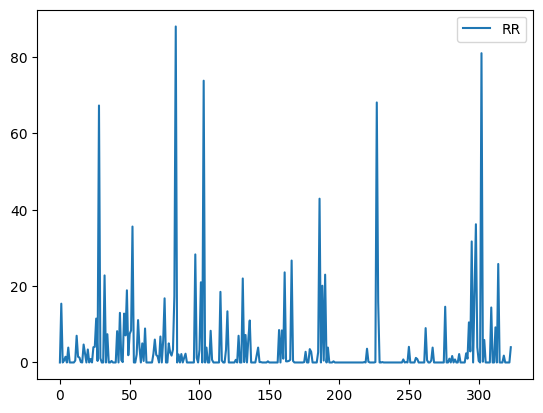

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,23.8,32.0,0.0,27.5,27.3,24.6,15.4
1,31,31,2023-01-02,23.4,27.3,15.4,24.6,33.2,26.8,0.0
2,59,60,2023-01-03,21.8,33.2,0.0,26.8,33.1,27.2,0.5
3,90,92,2023-01-04,23.8,33.1,0.5,27.2,34.4,28.3,1.5
4,120,123,2023-01-05,24.3,34.4,1.5,28.3,34.0,28.5,0.0
...,...,...,...,...,...,...,...,...,...,...
319,319,359,2023-12-16,24.8,32.8,0.0,28.1,32.5,28.4,0.0
320,320,360,2023-12-17,24.6,32.5,0.0,28.4,32.9,28.4,0.0
321,321,361,2023-12-18,24.1,32.9,0.0,28.4,34.3,28.8,0.0
322,322,362,2023-12-19,23.9,34.3,0.0,28.8,34.0,29.7,4.0


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,27.5,24.6,15.4
1,15.4,24.6,26.8,0.0
2,0.0,26.8,27.2,0.5
3,0.5,27.2,28.3,1.5
4,1.5,28.3,28.5,0.0
...,...,...,...,...
319,0.0,28.1,28.4,0.0
320,0.0,28.4,28.4,0.0
321,0.0,28.4,28.8,0.0
322,0.0,28.8,29.7,4.0


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,27.5,24.6,15.4
1,15.4,24.6,26.8,0.0
2,0.0,26.8,27.2,0.5
3,0.5,27.2,28.3,1.5
4,1.5,28.3,28.5,0.0
...,...,...,...,...
318,1.8,29.2,28.1,0.0
319,0.0,28.1,28.4,0.0
320,0.0,28.4,28.4,0.0
321,0.0,28.4,28.8,0.0


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,27.5,24.6,15.4,0
1,15.4,24.6,26.8,0.0,1
2,0.0,26.8,27.2,0.5,2
3,0.5,27.2,28.3,1.5,3
4,1.5,28.3,28.5,0.0,4
...,...,...,...,...,...
318,1.8,29.2,28.1,0.0,318
319,0.0,28.1,28.4,0.0,319
320,0.0,28.4,28.4,0.0,320
321,0.0,28.4,28.8,0.0,321


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
258,258,29.4
259,259,29.7
260,260,30.2
261,261,26.7
262,262,27.8
...,...,...
318,318,29.2
319,319,28.1
320,320,28.4
321,321,28.4


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.56288107, 28.66963282, 28.84586493, 27.63248976, 28.01716296,
       28.22813526, 28.50858791, 28.09423693, 28.20098868, 27.99448723,
       28.41449217, 28.79916537, 28.21111348, 28.03994377, 28.00773479,
       28.28818744, 28.46441955, 28.64065166, 27.60097741, 28.36779261,
       28.26610327, 28.09493356, 28.44486658, 28.16947632, 28.10252716,
       28.10505836, 28.28129047, 27.62375821, 27.93895105, 28.4278448 ,
       28.29141527, 28.4329072 , 28.12277676, 28.33374906, 28.33628026,
       28.13037037, 28.20238193, 28.51757477, 27.89478269, 28.00153444,
       27.72614419, 28.21503793, 27.73120659, 27.87269851, 28.43107263,
       27.66931982, 27.42866975, 27.04905895, 27.98957506, 27.99210626,
       28.41151965, 27.75398739, 27.96495968, 28.28015252, 27.9352819 ,
       28.21573456, 28.35722649, 28.46397823, 28.18858798, 28.05215845,
       28.64527275, 28.26566194, 28.37241369, 28.37494489, 28.51643682])

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.7393691241020974 0.9097450325205664


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
258,258,29.4
259,259,29.7
260,260,30.2
261,261,26.7
262,262,27.8
...,...,...
318,318,29.2
319,319,28.1
320,320,28.4
321,321,28.4


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
258,28.562881
259,28.669633
260,28.845865
261,27.632490
262,28.017163
...,...
318,28.645273
319,28.265662
320,28.372414


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

<ipython-input-26-a78c5f2a57f4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,27.5,NaN
1,24.6,NaN
2,26.8,NaN
3,27.2,NaN
4,28.3,NaN
...,...,...
318,29.2,28.645273
319,28.1,28.265662
320,28.4,28.372414
321,28.4,28.374945


<Axes: >

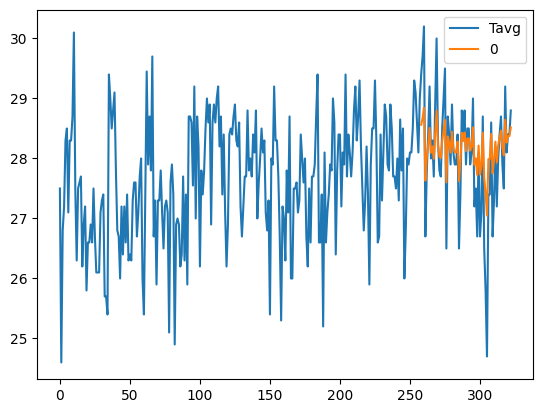

In [27]:
kan.plot()

In [28]:
new_data = [[354,28.8],[355,28.8],[356,28.8],[357,28.8],[358,28.8],[359,28.8],[360,28.8]]
lr.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.59743524, 28.59996644, 28.60249764, 28.60502884, 28.60756004,
       28.61009124, 28.61262244])

In [29]:
kan.to_json('Prediksi Gorontalo.json')